## Phase 1 Project Submission

Please fill out:
* Student name: Hellen Mwangi
* Student pace:part time 
* Scheduled project review 16/4/2023/00.00am: 
* Instructor name: Noah Kandie
* Blog post URL:
  

# Microsoft Movie Studio Venture Project




# Overview


This project helps to explore relationships between  budget, genre, rt_movies average ratings score, and ROI.On this project four datasets will be used for analysis, ie tmbd_movies,tn_movies,rt_movies and bom_movies.Bes option of studios is also in place to guide more on which studios to use to market the movies.Commedy,drama ,comedy/drama,drama/mystery and suspense appears to be the most popular.In terms of ROI the correlation is positive in that as genres are being put together they perform better but it depends of whats put together.Eg dramas seem to sell more .


# Business Problem.
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Variables Used .
1. Return investment
2. Genre that is most prefered
3. Movie ratings and vote average



# The Research Questions. 

1. Which genre is the most prefered by a large audience?
2. Which genre has the greatest return investment if they need to venture in this movie business?
3. Which movie genre has the highest ratings?


# DATASETS PROVIDED FOR THE PROJECT.

the folder zippedData are movie datasets from:

1. Box Office Mojo.
2. IMDB. 
3. Rotten Tomatoes.
4. TheMovieDB. 
5. The Numbers.

# DATASETS USED FOR THE PROJECT ANALYSIS AND VISUALIZATION OF DATA.

NB. after opening the above data the below were used for the project.
1. bom.movie_gross.csv
2. tn_movies.csv
3. tmdb.movies.csv
4. rt_movies.csv



# DATA UNDERSTANDING.





## Exploring Data From The given Datasets.


In [239]:
# Your code here - remember to use markdown cells for comments as well!
# importing all relevant alias
import pandas as pd
import csv 
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [240]:
# viewing first 5 entries
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [241]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [242]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [243]:
bom_df.isnull()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [244]:
bom_df.duplicated().sum()

0

In [245]:
#Data processing 
#i will only consider three features here ,foreign gross and domestic gross and title

In [246]:
bom_df = bom_df[['studio','title', 'foreign_gross', 'domestic_gross']]

bom_df.head()

,studio,title,foreign_gross,domestic_gross
0,BV,Toy Story 3,652000000,415000000.0
1,BV,Alice in Wonderland (2010),691300000,334200000.0
2,WB,Harry Potter and the Deathly Hallows Part 1,664300000,296000000.0
3,WB,Inception,535700000,292600000.0
4,P/DW,Shrek Forever After,513900000,238700000.0


In [247]:
#Remove NaN and non-numeric values from the foreign_gross and domestic_gross columns
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'], errors='coerce')
bom_df = bom_df.dropna(subset=['foreign_gross', 'domestic_gross'])

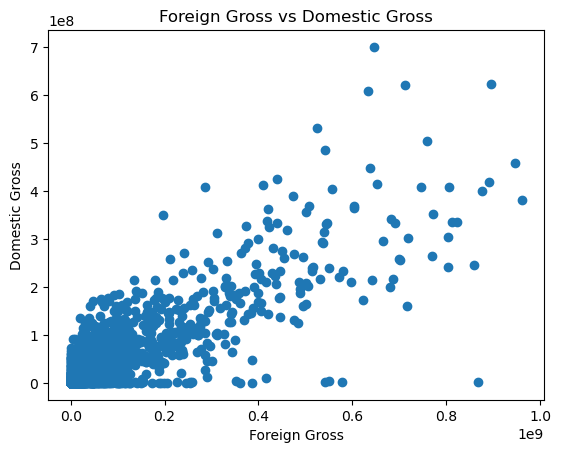

In [248]:
import matplotlib.pyplot as plt

plt.scatter(bom_df['foreign_gross'], bom_df['domestic_gross'])
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Foreign Gross vs Domestic Gross')
plt.show()


 The scatter plot shows that there is a positive correlation,thus showing that movies with higher domestic gross also has high foreign gross
 



## Data Exploration on zippedData/tmdb.movies.csv.gz

In [249]:
# viewing data on zippedData/tmdb.movies.csv.gz
tm_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tm_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [250]:
tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [251]:
tm_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [252]:
tm_df.isnull()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False,False


In [253]:
tm_df.dropna()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [254]:
tm_df.drop_duplicates()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [255]:
tm_df.value_counts()

Unnamed: 0  genre_ids            id      original_language  original_title                                popularity  release_date  title                                         vote_average  vote_count
0           [12, 14, 10751]      12444   en                 Harry Potter and the Deathly Hallows: Part 1  33.533      2010-11-19    Harry Potter and the Deathly Hallows: Part 1  7.7           10788         1
17675       [18, 27]             340103  en                 The Monster                                   8.515       2016-11-11    The Monster                                   5.2           242           1
17685       [37, 18]             333386  en                 The Duel                                      8.433       2016-06-24    The Duel                                      5.4           150           1
17684       [18, 10749, 10770]   410314  en                 A Wish for Christmas                          8.437       2016-11-05    A Wish for Christmas                     

In [256]:
# loading and viewing data
tn_movies=pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)
tn_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [257]:
tn_movies.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [258]:
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [259]:
print(tn_movies.isna().sum().sum())

0


In [260]:
# loading and viewing zippedData/rt.movie_info.tsv.gz dataset
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [261]:
rt_movies.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [262]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# DATA ANALYSIS AND  CLEANING FOR THE FOUR CHOSEN DATASETS

In [263]:
# cleaning and chosing the data to use in final analysis
#bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
# i chose to work with the below columns on the bom_df dataset
bom_df.head()

,studio,title,foreign_gross,domestic_gross
0,BV,Toy Story 3,652000000.0,415000000.0
1,BV,Alice in Wonderland (2010),691300000.0,334200000.0
2,WB,Harry Potter and the Deathly Hallows Part 1,664300000.0,296000000.0
3,WB,Inception,535700000.0,292600000.0
4,P/DW,Shrek Forever After,513900000.0,238700000.0


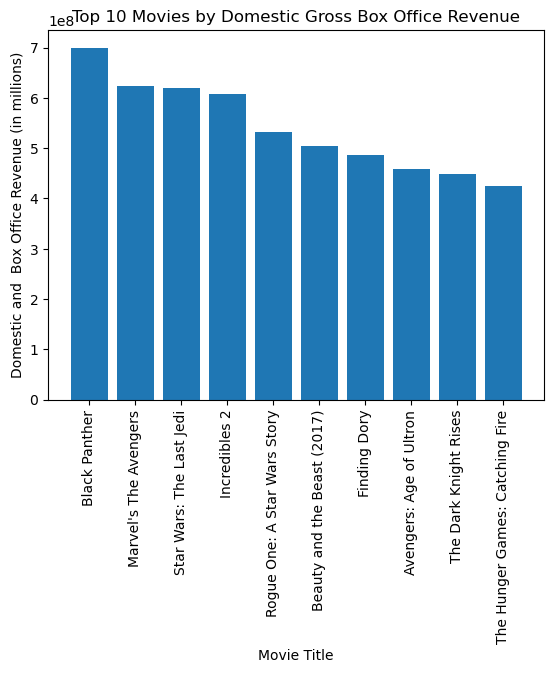

In [264]:
import matplotlib.pyplot as plt

# Get top 10 movies by domestic gross revenue
top_10 = bom_df.sort_values(by='domestic_gross', ascending=False).head(10)

# Create bar plot
plt.bar(top_10['title'], top_10['domestic_gross'])

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add axis labels and title
plt.xlabel('Movie Title')
plt.ylabel('Domestic and  Box Office Revenue (in millions)')
plt.title('Top 10 Movies by Domestic Gross Box Office Revenue')

# Show plot
plt.show()


In [265]:
# converting string integr and then get descriptive statistics
a = bom_df['foreign_gross'].dropna().reset_index()
a['foreign_gross'] = pd.to_numeric(a['foreign_gross'], errors='coerce')
a['foreign_gross'].describe()

count    2.004000e+03
mean     7.590713e+07
std      1.382501e+08
min      6.000000e+02
25%      3.900000e+06
50%      1.955000e+07
75%      7.615000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

Text(0.5, 1.0, 'Top Ten Movie Studios')

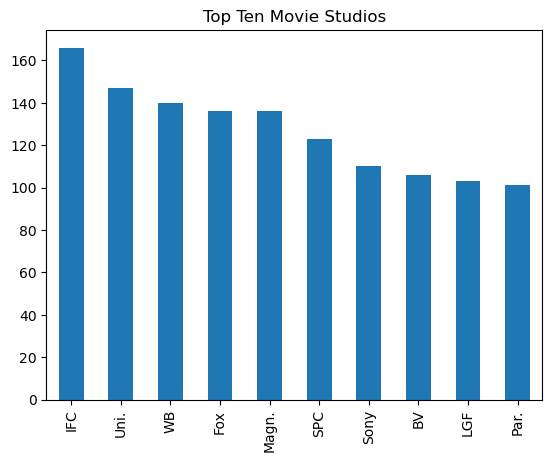

In [303]:
# ploting a bar graph on top studos doing well
bom_df_studio = bom_df['studio'].value_counts().head(10)
bom_df_studio
# plotting studio 
bom_df['studio'].value_counts().head(10).plot(kind = 'bar')
plt.title('Top Ten Movie Studios')

In [267]:
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Text(0.5, 1.0, 'Top Ten Movie Studios')

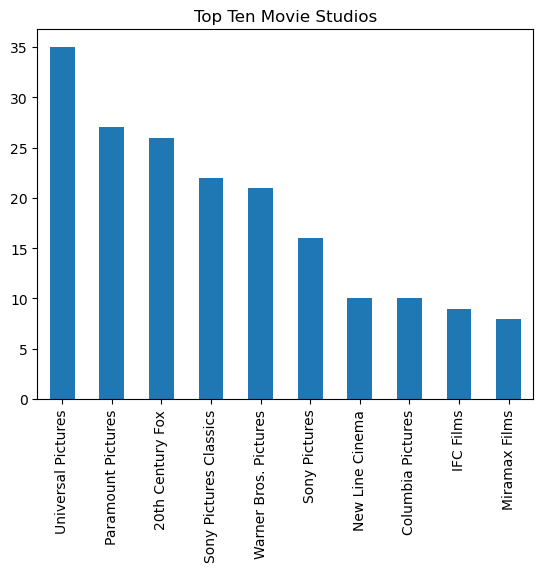

In [304]:
# checking and viewing best movie studios
rt_movies['studio'].value_counts().head(10).plot(kind = 'bar')
plt.title('Top Ten Movie Studios')

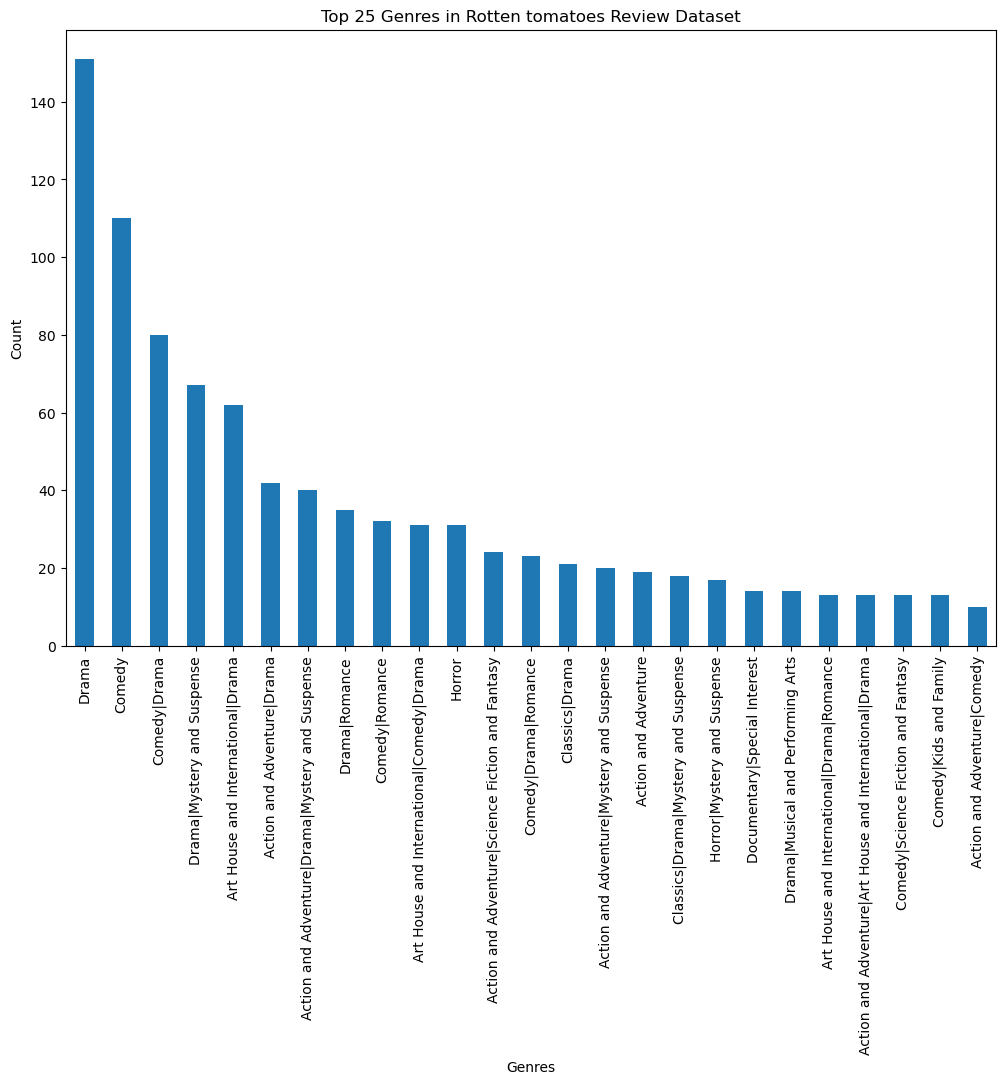

In [269]:
# set figure size
# viewing top 25 genres that are doing well
plt.figure(figsize=(12, 8))

# plot bar chart
rt_movies['genre'].value_counts().head(25).plot(kind='bar')

# set x and y labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 25 Genres in Rotten tomatoes Review Dataset')

# show the plot
plt.show()

In [270]:
import pandas as pd

# Load the datasets
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Merge the datasets based on the 'studio' column
merged_df = pd.merge(rt_movies, bom_df, on='studio')

# View the first few rows of the merged dataset
merged_df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,title,domestic_gross,foreign_gross,year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Outside the Law (Hors-la-loi),96900.0,3300000,2010
1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Fireflies in the Garden,70600.0,3300000,2011
2,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Keith Lemon: The Film,NaN,4000000,2012
3,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Plot for Peace,7100.0,NaN,2014
4,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Secret Superstar,NaN,122000000,2017


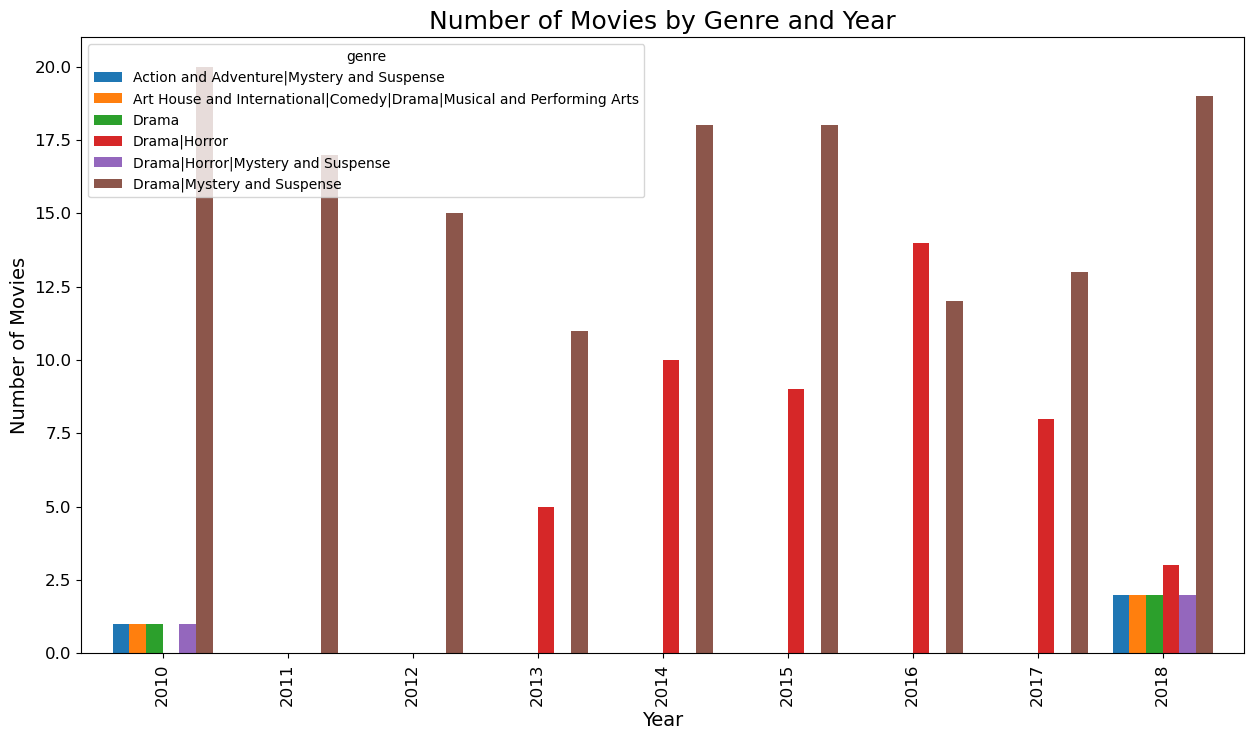

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
merged_df = pd.merge(pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t'), pd.read_csv('zippedData/bom.movie_gross.csv.gz'))

# Remove any unnecessary columns
merged_df.drop(['id', 'synopsis', 'rating', 'director', 'writer', 'theater_date', 'currency', 'foreign_gross'], axis=1, inplace=True)

# Remove any rows with missing data
merged_df.dropna(inplace=True)

# Convert year column to datetime format
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')

# Extract year from the datetime column
merged_df['year'] = merged_df['year'].dt.year

# Group data by genre and year and calculate the count of movies in each group
grouped_df = merged_df.groupby(['genre', 'year'])['title'].count().reset_index()

# Create pivot table of movie counts by year and genre
pivot_df = grouped_df.pivot_table(index='year', columns='genre', values='title')

# Plot a bar graph of the pivot table
ax = pivot_df.plot(kind='bar', figsize=(15, 8), width=0.8, fontsize=12)
ax.set_title('Number of Movies by Genre and Year', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Movies', fontsize=14)
plt.show()

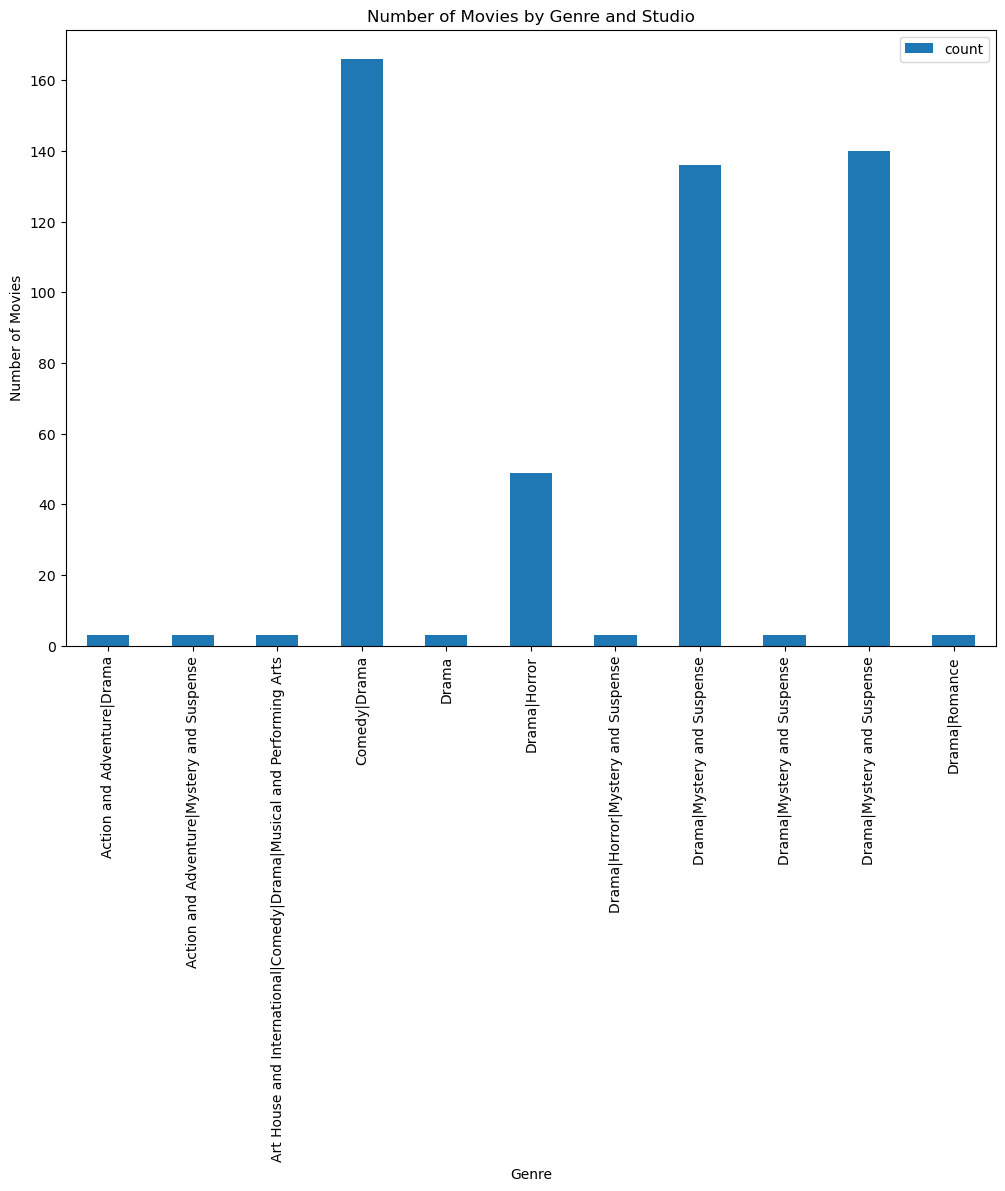

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets and merge them as shown in the previous example
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
merged_df = pd.merge(rt_movies, bom_df, on='studio')

# Group the merged dataset by genre and studio, and count the number of movies in each group
grouped_df = merged_df.groupby(['genre', 'studio']).size().reset_index(name='count')

# Create a bar graph of genre vs studio using the grouped data
grouped_df.plot(kind='bar', x='genre', y='count', figsize=(12,8))
plt.title('Number of Movies by Genre and Studio')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [273]:
tn_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [274]:
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
tn_movies = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
merged_df = pd.merge(bom_df, tn_movies, left_on='title', right_on='movie', how='inner')
merged_df

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [275]:
# removing $ to make it workable
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
merged_df['production_budget'] = merged_df['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


C:\Users\pc\AppData\Local\Temp\ipykernel_16028\1524873247.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['worldwide_gross'] = merged_df['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\pc\AppData\Local\Temp\ipykernel_16028\1524873247.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['production_budget'] = merged_df['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


In [276]:
# the merged tn_movies and bom_movies datasets for better analysis
merged_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000.0,"$292,576,195",8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,"$300,531,751",7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000.0,"$312,433,331",6.211564e+08


C:\Users\pc\AppData\Local\Temp\ipykernel_16028\1222537528.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['worldwide_gross'] = merged_df['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\pc\AppData\Local\Temp\ipykernel_16028\1222537528.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['production_budget'] = merged_df['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


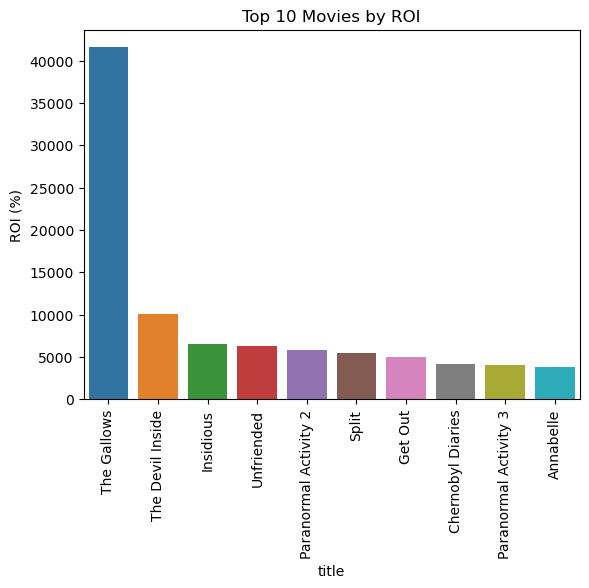

In [277]:

# Calculate ROI and create top 10 dataframe
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
merged_df['production_budget'] = merged_df['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
merged_df['roi'] = (merged_df['worldwide_gross'] - merged_df['production_budget']) / merged_df['production_budget'] * 100
top_10 = merged_df.sort_values('roi', ascending=False).head(10)

# Create bar plot
sns.barplot(x='title', y='roi', data=top_10)
plt.xticks(rotation=90)
plt.ylabel('ROI (%)')
plt.title('Top 10 Movies by ROI')
plt.show()

In [278]:
tm_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


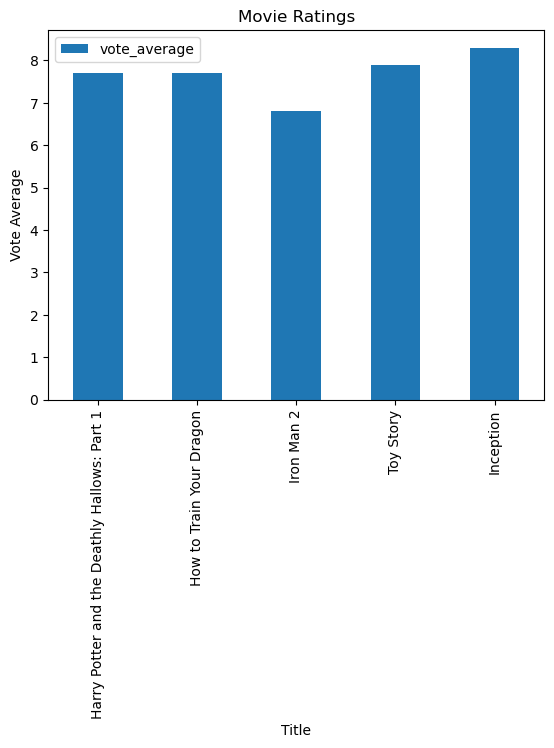

In [298]:

# Create a data frame
data = {
    'title': ['Harry Potter and the Deathly Hallows: Part 1', 'How to Train Your Dragon', 'Iron Man 2', 'Toy Story', 'Inception'],
    'vote_average': [7.7, 7.7, 6.8, 7.9, 8.3]
}
df = pd.DataFrame(data)

# Create a bar plot
df.plot(kind='bar', x='title', y='vote_average')

# Set the plot title and axis labels
plt.title('Movie Ratings')
plt.xlabel('Title')
plt.ylabel('Vote Average')

# Show the plot
plt.show()


In [280]:
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Text(0.5, 1.0, 'Release Month')

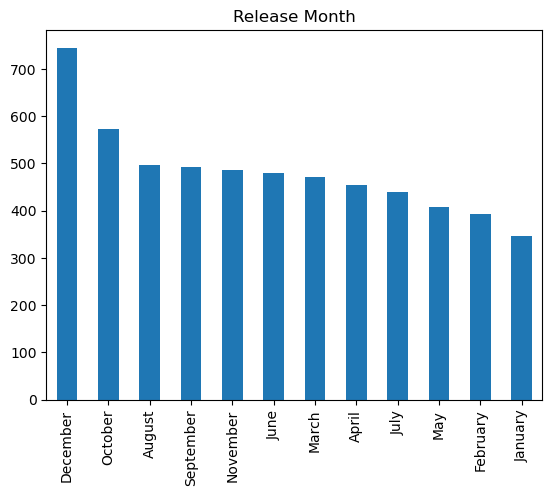

In [305]:
# convert release date column to datetime values
tn_movies['release_date'] = pd.to_datetime(tn_movies['release_date'])
# am creating release month column
tn_movies['release_month'] = tn_movies['release_date'].dt.strftime('%B')
# plotting a  graph for the release month
tn_movies['release_month'].value_counts().plot(kind='bar')
plt.title('Release Month')


In [301]:
# working on the merged datasets rt_movies and tn_movies to achieve ROI
merged_movies = pd.merge(rt_movies, tn_movies, on='id', how='inner')
merged_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December
1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2009-05-29,Up,"$175,000,000","$293,004,164","$731,463,377",May
2,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2014-03-07,Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430",March
3,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2010-12-17,How Do You Know?,"$120,000,000","$30,212,620","$49,628,177",December
4,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2015-12-11,In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309",December


In [283]:
merged_movies['worldwide_gross'] = merged_movies['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
merged_movies['production_budget'] = merged_movies['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


C:\Users\pc\AppData\Local\Temp\ipykernel_16028\2917971715.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_movies['worldwide_gross'] = merged_movies['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\pc\AppData\Local\Temp\ipykernel_16028\2917971715.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_movies['production_budget'] = merged_movies['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


In [284]:
merged_movies['worldwide_gross'] = merged_movies['worldwide_gross'].astype(str).str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(float)
merged_movies['production_budget'] = merged_movies['production_budget'].astype(str).str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(float)


In [291]:
merged_movies.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,roi
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2009-12-18,Avatar,425000000.0,"$760,507,625",2.776345e+09,December,5.532577
1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2009-05-29,Up,175000000.0,"$293,004,164",7.314634e+08,May,3.179791
2,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2014-03-07,Mr. Peabody & Sherman,145000000.0,"$111,506,430",2.698064e+08,March,0.860734
3,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2010-12-17,How Do You Know?,120000000.0,"$30,212,620",4.962818e+07,December,-0.586432
4,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2015-12-11,In the Heart of the Sea,100000000.0,"$25,020,758",8.969331e+07,December,-0.103067
5,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2007-06-08,Ocean's Thirteen,85000000.0,"$117,144,465",3.117445e+08,June,2.667582
6,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2003-11-26,Timeline,80000000.0,"$19,480,739",2.670318e+07,November,-0.666210
7,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2009-08-21,Inglourious Basterds,70000000.0,"$120,774,594",3.169153e+08,August,3.527361
8,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,2012-11-21,Red Dawn,65000000.0,"$44,806,783",4.816415e+07,November,-0.259013
9,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1997-11-26,Alien: Resurrection,60000000.0,"$47,795,018",1.607000e+08,November,1.678333


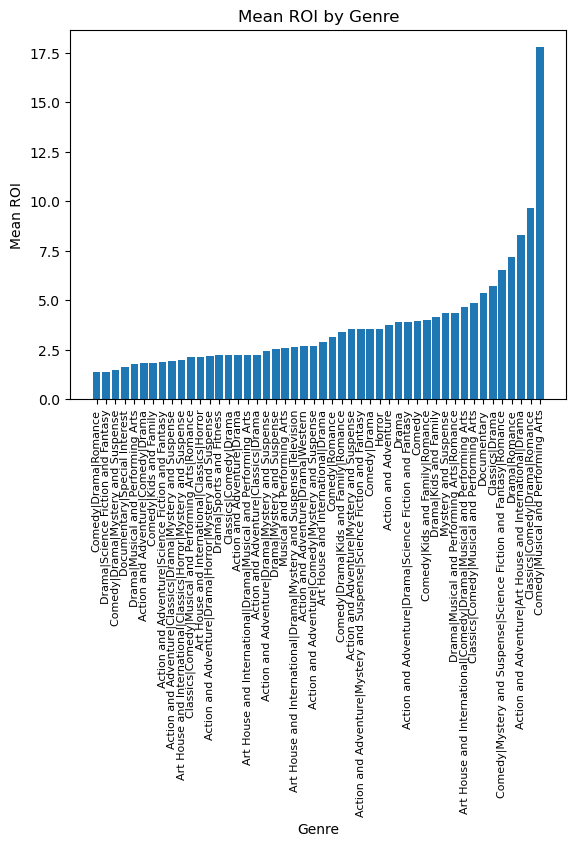

In [297]:
#plot ROI on genres to see the correlation 
merged_movies['roi'] = (merged_movies['worldwide_gross'] - merged_movies['production_budget']) / merged_movies['production_budget']

# group movies by genre and calculate mean ROI for each genre
roi_by_genre = merged_movies.groupby('genre')['roi'].mean().sort_values()

# create bar graph of mean ROI vs genre
plt.bar(roi_by_genre.index, roi_by_genre.values)

# set title and axis labels
plt.title('Mean ROI by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Mean ROI',fontsize=10)

# display the plot
plt.show()